# Thompson Sampling  

Based on https://analyticsindiamag.com/thompson-sampling-explained-with-python-code/

In [14]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

random.seed(1)

data = {}

data['B1'] = [random.randint(0, 1) for x in range(200)]  # NB: upper limit in randint(0, 1) is inclusive
data['B2'] = [random.randint(0, 1) for x in range(200)]
data['B3'] = [random.randint(0, 1) for x in range(200)]
data['B4'] = [random.randint(0, 1) for x in range(200)]
data['B5'] = [random.randint(0, 1) for x in range(200)]

data = pd.DataFrame(data)

display(data)

,B1,B2,B3,B4,B5
0,0,1,0,0,1
1,0,0,0,0,0
2,1,1,1,1,0
3,0,1,1,1,1
4,1,1,1,1,0
...,...,...,...,...,...
195,1,1,0,1,1
196,0,0,0,0,1
197,1,0,0,0,1
198,1,0,1,0,0


In [7]:
observations = 200
machines = 5

In Thompson Sampling each machine is selected based on the <span style="color:red">beta distribution</span> of rewards and penalties associated with each machine. And so we need a list to save the machine that has been selected by Thompson Sampling for a specific round/observation.

In [8]:
machine_selected = []

We will now initialize 3 variables,

- one to store the rewards or 1’s received by each Slot Machine/Bandit that was selected by the Thompson Sampling algorithm,  
- one to store the penalties or 0’s received by each Slot Machine/Bandit that was selected by the Thompson Sampling algorithm, and,  
- a variable to store the total number of rewards obtained using the Thompson Sampling algorithm  

In [9]:
rewards = [0] * machines
penalties = [0] * machines
total_rewards = 0

In [10]:
for n in range(0, observations):
    bandit = 0
    beta_max = 0
    
    for i in range(0, machines):
        beta_d = random.betavariate(rewards[i] + 1, penalties[i] + 1)
        if beta_d > beta_max:
            beta_max = beta_d
            bandit = i
    
    machine_selected.append(bandit)
    
    reward = data.values[n, bandit]
    
    if reward == 1:
        rewards[bandit] += 1
    else:
        penalties[bandit] += 1
    total_rewards += reward

print(f'Rewards by Machine: {rewards}')
print(f'Total Rewards: {total_rewards}')
print(f'Machine Selected at each round by Thompson Sampling:\n{machine_selected}')

Rewards by Machine: [2, 5, 58, 20, 32]
Total Rewards: 117
Machine Selected at each round by Thompson Sampling:
[2, 0, 4, 3, 3, 1, 2, 3, 3, 0, 2, 0, 4, 3, 3, 3, 1, 3, 1, 4, 3, 1, 3, 4, 3, 4, 4, 4, 3, 1, 3, 3, 4, 3, 4, 4, 4, 1, 4, 3, 4, 3, 3, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 1, 2, 4, 4, 4, 4, 2, 4, 4, 3, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 1, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 1, 4, 2, 2, 2, 4, 2, 2, 3, 2, 2, 4, 4, 2, 2, 4, 0, 4, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 4, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 4, 2, 2, 2]


Text(0, 0.5, 'Rewards by each Machine')

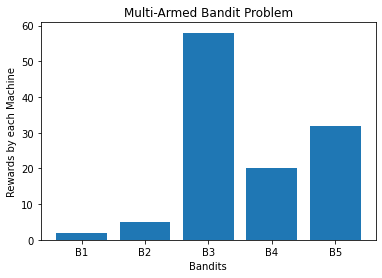

In [13]:
plt.figure()
plt.bar(['B1', 'B2', 'B3', 'B4', 'B5'], rewards)
plt.title('Multi-Armed Bandit Problem')
plt.xlabel('Bandits')
plt.ylabel('Rewards by each Machine')

In [28]:
print(f'Number of times each machine was selected by the Thompson Sampling algorithm:')
print(dict(sorted(Counter(machine_selected).items())))  # Counter is like a dict

Number of times each machine was selected by the Thompson Sampling algorithm:
{0: 6, 1: 12, 2: 92, 3: 35, 4: 55}


In [31]:
nselected = dict(sorted(Counter(machine_selected).items()))  # Counter is like a dict

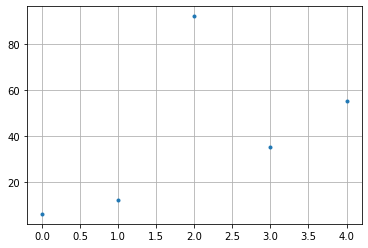

In [37]:
plt.figure()
plt.plot(nselected.keys(), nselected.values(), '.')
plt.grid()

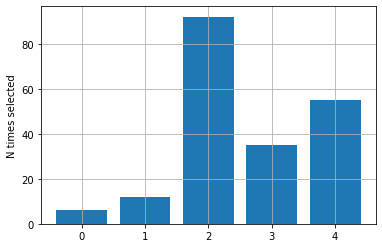

In [40]:
plt.figure()
plt.bar(nselected.keys(), nselected.values())
plt.ylabel(f'N times selected')
plt.grid()